## <center>Visualizations using Python</center>
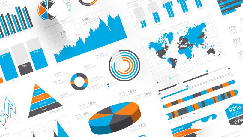

### <center>Using Pandas - the easy way to visualize data</center>
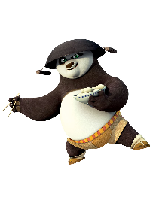

#### Connect to the database...

In [1]:
# Using pyodbc to connect to SQL Server and access data via a cursor. 
# Using Windows integrated security.

import pyodbc

conndw = pyodbc.connect("Driver={ODBC Driver 13 for SQL Server};"
                      "Server=localhost\MSSQLServer01;"
                      "Database=AdventureWorksDW2017;"
                      "Trusted_Connection=yes;")


cursordw = conndw.cursor()

In [5]:
cursordw.execute('SELECT top 5 * FROM dbo.DimDate').fetchall()

[(20050101, datetime.date(2005, 1, 1), 7, 'Saturday', 'Sábado', 'Samedi', 1, 1, 1, 'January', 'Enero', 'Janvier', 1, 1, 2005, 1, 3, 2005, 2),
 (20050102, datetime.date(2005, 1, 2), 1, 'Sunday', 'Domingo', 'Dimanche', 2, 2, 2, 'January', 'Enero', 'Janvier', 1, 1, 2005, 1, 3, 2005, 2),
 (20050103, datetime.date(2005, 1, 3), 2, 'Monday', 'Lunes', 'Lundi', 3, 3, 2, 'January', 'Enero', 'Janvier', 1, 1, 2005, 1, 3, 2005, 2),
 (20050104, datetime.date(2005, 1, 4), 3, 'Tuesday', 'Martes', 'Mardi', 4, 4, 2, 'January', 'Enero', 'Janvier', 1, 1, 2005, 1, 3, 2005, 2),
 (20050105, datetime.date(2005, 1, 5), 4, 'Wednesday', 'Miércoles', 'Mercredi', 5, 5, 2, 'January', 'Enero', 'Janvier', 1, 1, 2005, 1, 3, 2005, 2)]

### Let's make life easier by defining a function to get data.

In [37]:
import pyodbc
import pandas as pd

def get_db_data(sqlstatement, 
                driver = "{ODBC Driver 13 for SQL Server}",
                server = "localhost\MSSQLServer01",
                database = "AdventureWorksDW2017"):
    
    '''
        get_db_data takes a SQL query as input and returns a result
    
        arguments:
        
            sqlstatement = query you want to execute
            driver = database driver to use
            server = database server name
            database = database name 
    '''

    conn = pyodbc.connect("Driver=" + driver + ";"
                          "Server=" + server + ";"
                          "Database=" + database + ";"
                          "Trusted_Connection=yes;")

    cur = conn.cursor()
    
    # result = cur.execute(sqlstatement).fetchall()
    
    result = pd.read_sql(sqlstatement, conn)
    
    # cur.close()
    conn.close()
    
    return result

In [38]:
# If we want the default database, no need to pass it as an argument.

get_db_data('select top 3 * from dbo.DimDate')

DateKey FullDateAlternateKey  DayNumberOfWeek EnglishDayNameOfWeek  \
0  20050101           2005-01-01                7             Saturday   
1  20050102           2005-01-02                1               Sunday   
2  20050103           2005-01-03                2               Monday   

  SpanishDayNameOfWeek FrenchDayNameOfWeek  DayNumberOfMonth  DayNumberOfYear  \
0               Sábado              Samedi                 1                1   
1              Domingo            Dimanche                 2                2   
2                Lunes               Lundi                 3                3   

   WeekNumberOfYear EnglishMonthName SpanishMonthName FrenchMonthName  \
0                 1          January            Enero         Janvier   
1                 2          January            Enero         Janvier   
2                 2          January            Enero         Janvier   

   MonthNumberOfYear  CalendarQuarter  CalendarYear  CalendarSemester  \
0                  1                1          2005                 1   
1                  1                1          2005                 1   
2                  1                1          2005                 1   

   FiscalQuarter  FiscalYear  FiscalSemester  
0              3        2005               2  
1              3        2005               2  
2              3        2005               2

In [39]:
# If we want a different database, just specify it. 

get_db_data('select top 3 * from Person.Person', database = 'AdventureWorks2017')

BusinessEntityID PersonType NameStyle Title FirstName MiddleName  \
0                 1         EM     False  None       Ken          J   
1                 2         EM     False  None     Terri        Lee   
2                 3         EM     False  None   Roberto       None   

     LastName Suffix  EmailPromotion AdditionalContactInfo  \
0     Sánchez   None               0                  None   
1       Duffy   None               1                  None   
2  Tamburello   None               0                  None   

                                        Demographics  \
0  <IndividualSurvey xmlns="http://schemas.micros...   
1  <IndividualSurvey xmlns="http://schemas.micros...   
2  <IndividualSurvey xmlns="http://schemas.micros...   

                                rowguid ModifiedDate  
0  92C4279F-1207-48A3-8448-4636514EB7E2   2009-01-07  
1  D8763459-8AA8-47CC-AFF7-C9079AF79033   2008-01-24  
2  E1A2555E-0828-434B-A33B-6F38136A37DE   2007-11-04

In [28]:
help(get_db_data)

Help on function get_db_data in module __main__:

get_db_data(sqlstatement, driver='{ODBC Driver 13 for SQL Server}', server='localhost\\MSSQLServer01', database='AdventureWorksDW2017')
    get_db_data takes a SQL query as input and returns a result
    
    arguments:
    
        sqlstatement = query you want to execute
        driver = database driver to use
        server = database server name
        database = database name



In [41]:
df1 = get_db_data('select top 3 * from dbo.DimDate')
df1.head()

DateKey FullDateAlternateKey  DayNumberOfWeek EnglishDayNameOfWeek  \
0  20050101           2005-01-01                7             Saturday   
1  20050102           2005-01-02                1               Sunday   
2  20050103           2005-01-03                2               Monday   

  SpanishDayNameOfWeek FrenchDayNameOfWeek  DayNumberOfMonth  DayNumberOfYear  \
0               Sábado              Samedi                 1                1   
1              Domingo            Dimanche                 2                2   
2                Lunes               Lundi                 3                3   

   WeekNumberOfYear EnglishMonthName SpanishMonthName FrenchMonthName  \
0                 1          January            Enero         Janvier   
1                 2          January            Enero         Janvier   
2                 2          January            Enero         Janvier   

   MonthNumberOfYear  CalendarQuarter  CalendarYear  CalendarSemester  \
0                  1                1          2005                 1   
1                  1                1          2005                 1   
2                  1                1          2005                 1   

   FiscalQuarter  FiscalYear  FiscalSemester  
0              3        2005               2  
1              3        2005               2  
2              3        2005               2

## Visualizations

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'some numbers')

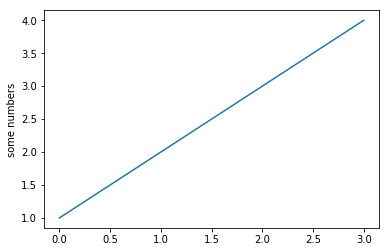

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot([1,2,3,4])
plt.ylabel('some numbers')

In [49]:
dfdate = get_db_data('select * from DimDate')

In [55]:
dfdate.dtypes

DateKey                  int64
FullDateAlternateKey    object
DayNumberOfWeek          int64
EnglishDayNameOfWeek    object
SpanishDayNameOfWeek    object
FrenchDayNameOfWeek     object
DayNumberOfMonth         int64
DayNumberOfYear          int64
WeekNumberOfYear         int64
EnglishMonthName        object
SpanishMonthName        object
FrenchMonthName         object
MonthNumberOfYear        int64
CalendarQuarter          int64
CalendarYear             int64
CalendarSemester         int64
FiscalQuarter            int64
FiscalYear               int64
FiscalSemester           int64
dtype: object

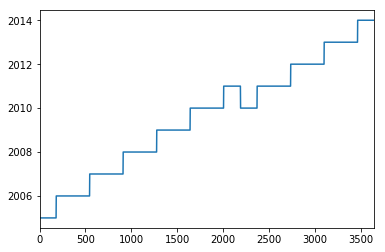

In [52]:
# Using the pandas plot() method...

dfdate['FiscalYear'].plot()

In [ ]:
plt.figure();

df.plot();

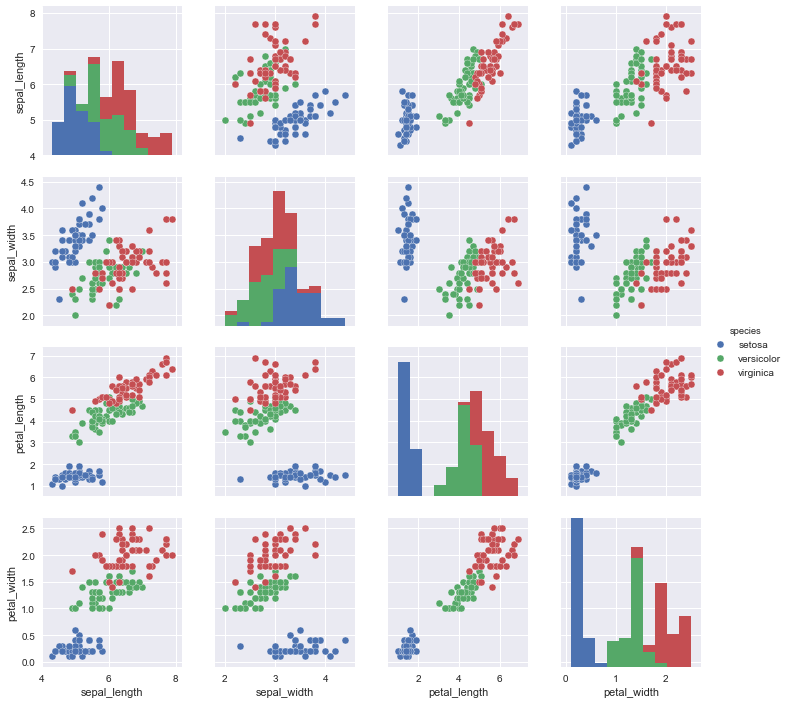

In [106]:
iris = sns.load_dataset("iris")
# iris.head()

sns.pairplot(iris, hue='species', size=2.5);

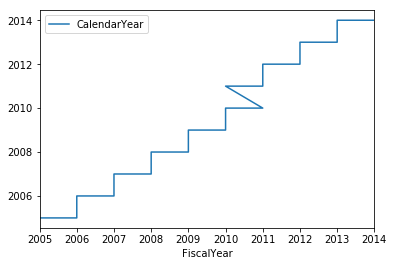

In [56]:
dfdate.plot(x='FiscalYear', y='CalendarYear')

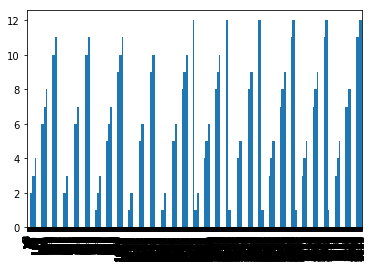

In [60]:
plt.figure();

dfdate['MonthNumberOfYear'].plot(kind='bar');

In [59]:
print('x')

x


In [61]:
dfinternetsales = get_db_data('select * from dbo.FactInternetSales')

In [62]:
dfinternetsales.shape

(60398, 26)

In [63]:
dfinternetsales.dtypes

ProductKey                        int64
OrderDateKey                      int64
DueDateKey                        int64
ShipDateKey                       int64
CustomerKey                       int64
PromotionKey                      int64
CurrencyKey                       int64
SalesTerritoryKey                 int64
SalesOrderNumber                 object
SalesOrderLineNumber              int64
RevisionNumber                    int64
OrderQuantity                     int64
UnitPrice                       float64
ExtendedAmount                  float64
UnitPriceDiscountPct            float64
DiscountAmount                  float64
ProductStandardCost             float64
TotalProductCost                float64
SalesAmount                     float64
TaxAmt                          float64
Freight                         float64
CarrierTrackingNumber            object
CustomerPONumber                 object
OrderDate                datetime64[ns]
DueDate                  datetime64[ns]


In [85]:
# You have to join threee tables to get the Product Category...

dfsales = get_db_data('''
SELECT SUM(SalesAmount) as SalesAmount, EnglishProductName as Product, EnglishProductCategoryName as ProductCategory,
EnglishProductSubcategoryName as ProductSubcategory
from dbo.FactInternetSales s
INNER JOIN dbo.DimProduct p
on (s.ProductKey = p.ProductKey)
INNER JOIN dbo.DimProductSubCategory ps
on (p.ProductSubcategoryKey = ps.ProductSubcategoryKey)
INNER JOIN dbo.DimProductCategory pc
on (ps.ProductCategoryKey = pc.ProductCategoryKey)
GROUP BY EnglishProductName, EnglishProductSubcategoryName, EnglishProductCategoryName
''')

In [86]:
dfsales.head()

SalesAmount                 Product ProductCategory ProductSubcategory
0      39591.0  All-Purpose Bike Stand     Accessories        Bike Stands
1      19688.1            AWC Logo Cap        Clothing               Caps
2       7218.6   Bike Wash - Dissolver     Accessories           Cleaners
3      12382.5         Classic Vest, L        Clothing              Vests
4      12636.5         Classic Vest, M        Clothing              Vests

In [103]:
import seaborn as sns
sns.set()

In [96]:
from pandasql import sqldf

dfsales2col = sqldf("SELECT ProductCategory, sum(SalesAmount) as SalesAmt FROM dfsales GROUP BY ProductCategory;", locals())
dfsales2col.set_index("ProductCategory",drop=True,inplace=True)
dfsales2col

SalesAmt
ProductCategory              
Accessories      7.007600e+05
Bikes            2.831814e+07
Clothing         3.397726e+05

<Figure size 576x396 with 0 Axes>

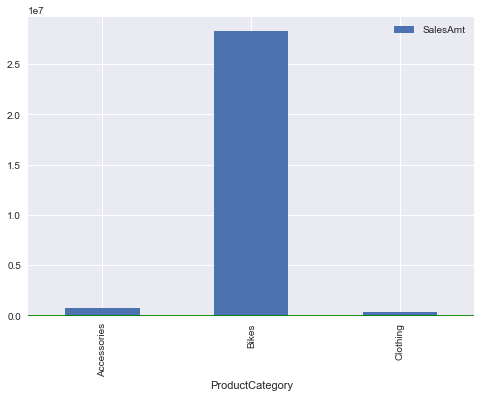

In [104]:
plt.figure()

dfsales2col.plot.bar()
plt.axhline(1, color='green');

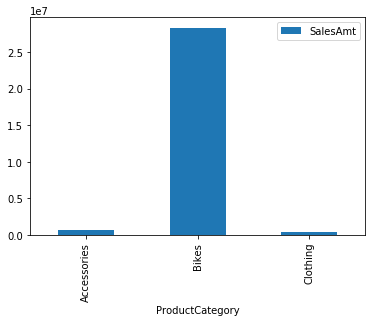

In [99]:
dfsales2col.plot.bar();